## Introduction to NLP (Natural Language Processing)
<br>
© mgr inż. Soveatin Kuntur / Winter School - Data Literacy
<br>
Warsaw, 06.02 - 10.02.2023

© Anna Wróblewska, improvements and adding more metrics, and classifiers


# Piotr Bielecki, Filip Kucia, Adam Czerwoński

As we know from lecture, general pipeline of NLP is as follows:
<br>
1. Data Preprocessing
<br>
2. Data Processing
<br>
3. Output

## Data Processing

Now we come to second part of our experiment which is data processing. This task will be classification problem. Which means, we will ask our model to classify the sentiment. It is worth to mention that, you can use your clean dataset to do this part. <br>

As for example reason, teacher will show how to use sklearn packages on this part.

## Dataset Description
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

You can download the dataset in your workspace (or in your local computer) by doing
<br>
nltk.download('twitter_samples')


In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords
import matplotlib.pyplot as plt            # library for visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [2]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\mipec\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

To make it easier, let us used pandas dataframe

In [4]:
# Create a dataframe from positive tweets
pos_tweet = pd.DataFrame(all_positive_tweets, columns=['Tweet'])
# Add a column to dataframe for positive sentiment value 1
pos_tweet['Sentiment'] = 1
# Create a temporary dataframe for negative tweets
neg_tweet = pd.DataFrame(all_negative_tweets, columns=['Tweet'])
# Add a column to temporary dataframe for negative sentiment value 0
neg_tweet['Sentiment'] = 0
# Combe positive and negative tweets in one single dataframe
#df = pos_tweet.append(neg_tweet, ignore_index=True)
df = pd.concat([neg_tweet, pos_tweet], ignore_index=True)

df = df.sample(frac = 1)
df.reset_index(drop=True, inplace=True)

In [5]:
df

,Tweet,Sentiment
0,@EmilyBett Happyyyyyy Birthdaaaaayyyy! :-),1
1,@Hegelbon That heart sliding into the waste ba...,0
2,and ano 22stans :(,0
3,@4JStudios Now you made me really angry and sa...,0
4,@JMaKiwi ...kinda explains why you you married...,1
...,...,...
9995,Great new opportunity for junior triathletes a...,1
9996,@ulaaaaa1909 Schade :(,0
9997,i feel so bad because i fell asleep like right...,0
9998,@ciaellB why beh :((,0


Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [6]:
# Displaying shape of dataset
print('Dataset size:',df.shape)
df.groupby('Sentiment').count()

Dataset size: (10000, 2)


,Tweet
Sentiment,
0,5000
1,5000


In [7]:
# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.1)
train

,Tweet,Sentiment
572,@magicbricks Yayy! :D Thanks ;) #GOHF,1
9302,First time buyers your invited :-)\n@love_belf...,1
8220,Good afternoon :),1
5333,@_ridabot let's talk about setokido :D,1
5605,wiellys Follback ya :),1
...,...,...
4583,Too many people asking when I'm back in LA :(,0
7692,"@itsAllieFx If you need someone to talk to, I ...",1
3958,"@WhiteZoey Great, I went to Kardamena, last su...",1
5698,@elizabethrosexx Great to hear! We are glad th...,1


In [10]:
test

,Tweet,Sentiment
9464,I really really really really really really li...,1
1286,@nongardener Thank you Pauline! :),1
9802,"@Espio1 @scully1888 It's madness, for sure. Th...",0
7370,When you complain to someone about something a...,1
6585,"@DrJonesWales no problem Rhys, have a good day...",1
...,...,...
6539,"@MangleTheLover Hey, You like FNaF? Check out ...",1
1698,@elfishy_fika done :),1
2421,"@synergymicro_ i legit am you loser, sit down ...",1
6898,"@BoltonLani Woohoo! Welcome aboard, Lani - gre...",1


Positive words


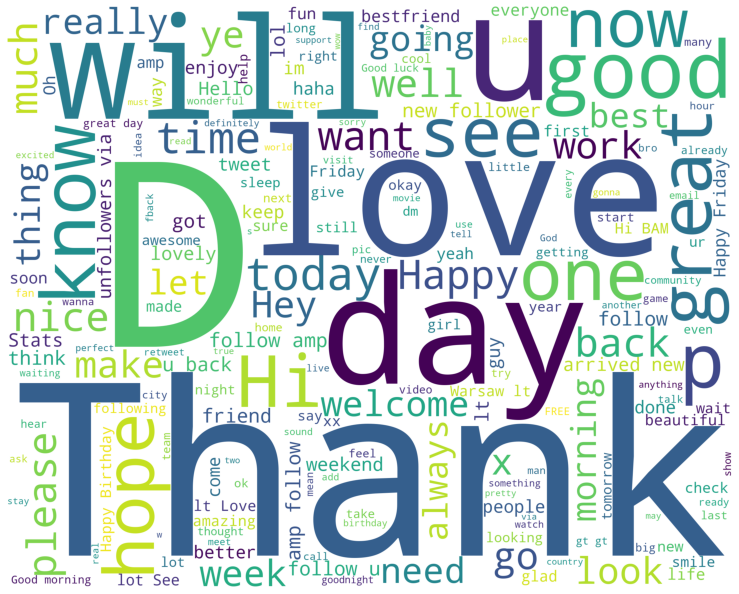

Negative words


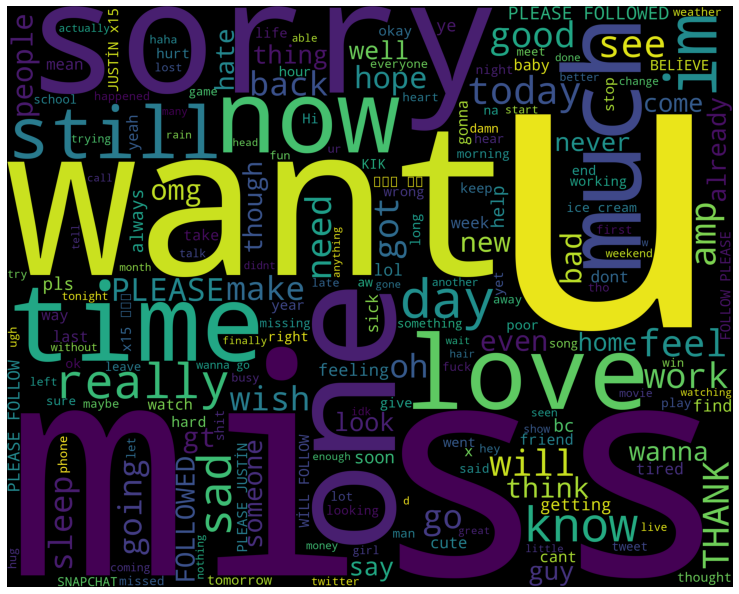

In [11]:
train_pos = train[ train['Sentiment'] == 1]
train_pos = train_pos['Tweet']
train_neg = train[ train['Sentiment'] == 0]
train_neg = train_neg['Tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mipec\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))

test_pos = test[ test['Sentiment'] == 1]
test_pos = test_pos['Tweet']
test_neg = test[ test['Sentiment'] == 0]
test_neg = test_neg['Tweet']

In [14]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

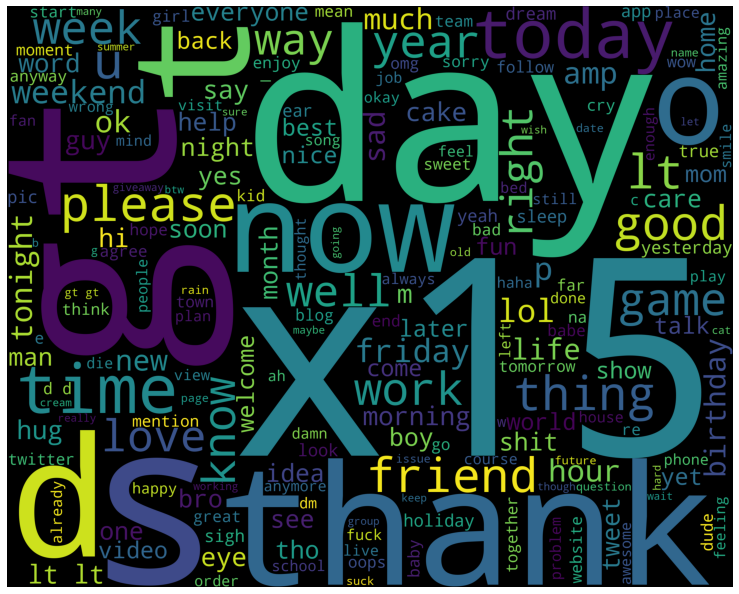

In [15]:
wordcloud_draw(w_features)

In [16]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [17]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0):
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 1):
        pos_cnt = pos_cnt + 1

print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 519/438 
[Positive]: 481/322 


## Useful links to start NLP
<br>
https://realpython.com/python-nltk-sentiment-analysis/

In [18]:
# prompt: print confusion matrix

from sklearn.metrics import confusion_matrix

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

for obj in test['Tweet']:
    true_labels.append(test.loc[test['Tweet'] == obj, 'Sentiment'].iloc[0])
    predicted_labels.append(classifier.classify(extract_features(obj.split())))

# Calculate and print the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[438  81]
 [159 322]]


In [19]:
#measure F1 score, and recall, and precision
#build other model, e.g. random forest for this task

In [20]:
# prompt: measure F1 score, and recall, and precision

from sklearn.metrics import f1_score, recall_score, precision_score

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multi-class problems
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
print("Recall:", recall)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision)


F1 Score: 0.7577988614800758
Recall: 0.76
Precision: 0.765096449991895


In [21]:
# prompt: add another metric for assesing the model

from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.76


In [22]:
# prompt: based on tweets prepare training set, without nltk library

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)


Accuracy: 0.74
F1 Score: 0.7399041171118086
Recall: 0.74
Precision: 0.7399030773736215
Confusion Matrix:
 [[393 126]
 [134 347]]


In [23]:
# prompt: the same as above but with random forest

from sklearn.ensemble import RandomForestClassifier

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)


Accuracy: 0.6
F1 Score: 0.5548061391115278
Recall: 0.6
Precision: 0.6962445307874986
Confusion Matrix:
 [[149 370]
 [ 30 451]]


In [27]:
# prompt: add sentiment analysis with Vader library

!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply sentiment analysis to the 'Tweet' column
train['Sentiment Scores'] = train['Tweet'].apply(get_sentiment_scores)

# Extract compound score (overall sentiment)
train['Compound Score'] = train['Sentiment Scores'].apply(lambda x: x['compound'])

# Assign sentiment labels based on compound score
train['Vader Sentiment'] = train['Compound Score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


# Print the DataFrame with sentiment scores and labels
print(train[['Tweet', 'Sentiment Scores', 'Compound Score', 'Vader Sentiment']])

# You can now analyze the 'Vader Sentiment' column to see how the Vader library categorized the tweets.

# Example: Analyze the distribution of sentiment labels
print(train['Vader Sentiment'].value_counts())



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\mipec\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


                                                  Tweet  \
5727  @myeongwh0re thank you anshe :( idk i just can...   
415     what usually happens :( https://t.co/6o3ZgNOnvh   
9396                  ice cream sandwich plsss :-((((((   
7682                :( lmfaoooo https://t.co/Gu0QjHPMnX   
745   @Cupacoco @CBBCTV @CBBCNews Interview with the...   
...                                                 ...   
204   @ncilla so thát's what i've been doing wrong :...   
6403                         @CaptaainMorgan okay :))))   
8847  @gadventures So hard to pick just one. The Inc...   
9585  @Chickowits :( Be careful...namechecking them ...   
9163  @SarahH9977 Thanks hun. Shame one of the sxrew...   

                                       Sentiment Scores  Compound Score  \
5727  {'neg': 0.13, 'neu': 0.663, 'pos': 0.207, 'com...          0.4310   
415   {'neg': 0.42, 'neu': 0.58, 'pos': 0.0, 'compou...         -0.4404   
9396  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0

# team work

RF, NB, LR, SVM, VADER
Precision, Recall, F1

In [ ]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

In [29]:
df.head(5)

,Tweet,Sentiment
0,@rizwanism :) just a choice of food. Left to t...,1
1,"@stayfaboo it will be up soon, i promise :)",1
2,I still want a cactus :( https://t.co/TD8A5vEc9p,0
3,@jenxmish @wittykrushnic you are the only thin...,0
4,My last cross country in IJ was amazing!!!!!!!...,0


In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [21]:
train, test = train_test_split(df,test_size = 0.1)

In [17]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stop words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize tokens
    return ' '.join(tokens)

# Apply preprocessing to the 'tweet' column
df['cleaned_tweet'] = df['Tweet'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mipec\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mipec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mipec\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_tweet'])

# Additional text statistics
df['word_count'] = df['cleaned_tweet'].apply(lambda x: len(x.split()))
df['char_count'] = df['cleaned_tweet'].apply(lambda x: len(x))
df['avg_word_length'] = df['char_count'] / (df['word_count'] + 1)

# Combine TF-IDF features and text statistics
X = np.hstack((tfidf_features.toarray(), df[['word_count', 'char_count', 'avg_word_length']].values))
y = df['Sentiment']  # Assuming 'sentiment' column exists in the dataframe

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, gnb_pred))

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       494
           1       0.75      0.70      0.72       506

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       494
           1       0.73      0.67      0.70       506

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       494
           1       0.79      0.72      0.75       506

    accuracy                           0.76      1000
   macro avg       0

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get VADER sentiment
def vader_sentiment_analysis(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0:
        return 1
    elif score['compound'] <= 0:
        return 0

# Apply VADER sentiment analysis to the cleaned tweets
df['vader_sentiment'] = df['cleaned_tweet'].apply(vader_sentiment_analysis)

# Evaluate the VADER sentiment analysis
print("VADER Sentiment Analysis Report:")
print(classification_report(df['Sentiment'], df['vader_sentiment']))

VADER Sentiment Analysis Report:
              precision    recall  f1-score   support

           0       0.79      0.31      0.45      5000
           1       0.57      0.92      0.70      5000

    accuracy                           0.61     10000
   macro avg       0.68      0.61      0.57     10000
weighted avg       0.68      0.61      0.57     10000



In [22]:
svm_model = SVC(kernel='linear', C = 0.01)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.81      0.69       494
           1       0.72      0.48      0.58       506

    accuracy                           0.64      1000
   macro avg       0.66      0.65      0.63      1000
weighted avg       0.66      0.64      0.63      1000



In [23]:
svm_model = SVC(kernel='poly', C = 0.01)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.92      0.66       494
           1       0.66      0.16      0.25       506

    accuracy                           0.53      1000
   macro avg       0.59      0.54      0.46      1000
weighted avg       0.59      0.53      0.45      1000



In [26]:
svm_model = SVC(kernel='poly', C = 0.01)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.92      0.66       494
           1       0.66      0.16      0.25       506

    accuracy                           0.53      1000
   macro avg       0.59      0.54      0.46      1000
weighted avg       0.59      0.53      0.45      1000



# Second Part - more advanced techniques 

In [1]:
from datasets import load_dataset
from textblob import TextBlob
from sklearn.metrics import classification_report
import pandas as pd

# Load the IMDb dataset (train and test split)
train_ds = load_dataset("stanfordnlp/imdb", split='train')
test_ds = load_dataset("stanfordnlp/imdb", split='test')

# Convert to DataFrames
train_df = pd.DataFrame(train_ds)
test_df = pd.DataFrame(test_ds)

# Apply TextBlob sentiment analysis to the test dataset
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return 1 if blob.sentiment.polarity > 0 else 0

# TextBlob predictions on test data
test_df['textblob_sentiment'] = test_df['text'].apply(get_textblob_sentiment)

# Prepare training data for FastText
fasttext_train_data = train_df[['text', 'label']].copy()
fasttext_train_data['label'] = fasttext_train_data['label'].apply(lambda x: '__label__' + str(x))

# Save the training data in the required format for FastText
fasttext_train_data_path = "fasttext_train_data.txt"
fasttext_train_data[['label', 'text']].to_csv(fasttext_train_data_path, index=False, header=False, sep=' ')

# Train the FastText model
fasttext_model = fasttext.train_supervised(fasttext_train_data_path)

# FastText predictions on the test data
test_df['fasttext_sentiment'] = test_df['text'].apply(lambda x: int(fasttext_model.predict(x)[0][0].replace("__label__", "")))

# Get the true labels
true_labels = test_df['label']

# Generate classification reports
textblob_report = classification_report(true_labels, test_df['textblob_sentiment'], target_names=['Negative', 'Positive'])
fasttext_report = classification_report(true_labels, test_df['fasttext_sentiment'], target_names=['Negative', 'Positive'])

# Output the results
print("TextBlob Classification Report:\n", textblob_report)
print("\nFastText Classification Report:\n", fasttext_report)


ModuleNotFoundError: No module named 'fasttext'

In [1]:
from datasets import load_dataset
from textblob import TextBlob
from sklearn.metrics import classification_report
import pandas as pd

# Load the IMDb dataset (train and test split)
train_ds = load_dataset("stanfordnlp/imdb", split='train')
test_ds = load_dataset("stanfordnlp/imdb", split='test')

# Convert to DataFrame for easier manipulation
test_df = pd.DataFrame(test_ds)

# Apply TextBlob sentiment analysis on the test dataset
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return 1 if blob.sentiment.polarity > 0 else 0

# TextBlob predictions on test data
test_df['textblob_sentiment'] = test_df['text'].apply(get_textblob_sentiment)

# Get the true labels
true_labels = test_df['label']

# Generate classification report for TextBlob
textblob_report = classification_report(true_labels, test_df['textblob_sentiment'], target_names=['Negative', 'Positive'])

# Output the results
print("TextBlob Classification Report:\n", textblob_report)

TextBlob Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.43      0.59     12500
    Positive       0.63      0.95      0.75     12500

    accuracy                           0.69     25000
   macro avg       0.76      0.69      0.67     25000
weighted avg       0.76      0.69      0.67     25000



In [3]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import pandas as pd

# Convert to DataFrame for easier manipulation
train_df = pd.DataFrame(train_ds)
test_df = pd.DataFrame(test_ds)

# Create a pipeline with TF-IDF vectorization and Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the Naive Bayes model
model.fit(train_df['text'], train_df['label'])

# Make predictions on the test set
test_predictions = model.predict(test_df['text'])

# Generate the classification report
nb_report = classification_report(test_df['label'], test_predictions, target_names=['Negative', 'Positive'])

# Output the results
print("Naive Bayes Classification Report:\n", nb_report)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.89      0.84     12500
    Positive       0.87      0.77      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [13]:
# Required Libraries
from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Text preprocessing: use TF-IDF vectorizer for simplicity
vectorizer = TfidfVectorizer(stop_words='english', max_features=50000)

# Fit the vectorizer on the training data and transform both train and test sets
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

# Use a simple Logistic Regression for classification
model = LogisticRegression(max_iter=100)

# Train the model
model.fit(X_train, train_df['label'])

# Evaluate the model using classification report
y_pred = model.predict(X_test)
print(classification_report(test_df['label'], y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [2]:
# Required imports
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import AdamW
from sklearn.metrics import classification_report
import torch
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the IMDb dataset (train and test split)
train_ds = load_dataset("stanfordnlp/imdb", split='train')
test_ds = load_dataset("stanfordnlp/imdb", split='test')

# Convert to DataFrames
train_df = pd.DataFrame(train_ds)
test_df = pd.DataFrame(test_ds)

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Preprocess the text (tokenize)
def preprocess_data(data, tokenizer, max_len=256):
    return tokenizer(
        list(data['text']),  # Input text
        padding=True,        # Add padding for sentences shorter than max_len
        truncation=True,     # Truncate sentences longer than max_len
        max_length=max_len,  # Maximum sentence length
        return_tensors='pt'  # Return PyTorch tensors
    )

# Preprocess the training and test data
train_encodings = preprocess_data(train_df, tokenizer)
test_encodings = preprocess_data(test_df, tokenizer)

# Create torch datasets
class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_labels = train_df['label'].tolist()
test_labels = test_df['label'].tolist()

train_dataset = IMDbDataset(train_encodings, train_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments for the Trainer
training_args = TrainingArguments(
    output_dir='./results',          # Output directory for model
    num_train_epochs=3,              # Number of training epochs
    per_device_train_batch_size=16,  # Batch size per device during training
    per_device_eval_batch_size=64,   # Batch size for evaluation
    warmup_steps=500,                # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # Strength of weight decay
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch"      # Evaluate at the end of each epoch
)

# Define the Trainer for training the model
trainer = Trainer(
    model=model,                         # The pre-trained BERT model
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # The training dataset
    eval_dataset=test_dataset,           # The evaluation dataset
    tokenizer=tokenizer,                 # The BERT tokenizer
)

# Train the model
trainer.train()

# Evaluate the model on the test set
predictions = trainer.predict(test_dataset)
preds = torch.argmax(torch.tensor(predictions.predictions), dim=-1).numpy()

# Generate and print the classification report
classification_report_output = classification_report(test_labels, preds, target_names=['Negative', 'Positive'])
print("\nBERT Classification Report:\n", classification_report_output)


: 

In [1]:
# Required imports
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import AdamW
from sklearn.metrics import classification_report
import torch
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the IMDb dataset (train and test split)
train_ds = load_dataset("stanfordnlp/imdb", split='train')
test_ds = load_dataset("stanfordnlp/imdb", split='test')

# Convert to DataFrames
train_df = pd.DataFrame(train_ds)
test_df = pd.DataFrame(test_ds)

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Preprocess the text (tokenize)
def preprocess_data(data, tokenizer, max_len=256):
    return tokenizer(
        list(data['text']),  # Input text
        padding=True,        # Add padding for sentences shorter than max_len
        truncation=True,     # Truncate sentences longer than max_len
        max_length=max_len,  # Maximum sentence length
        return_tensors='pt'  # Return PyTorch tensors
    )

# Preprocess the training and test data
train_encodings = preprocess_data(train_df, tokenizer)
test_encodings = preprocess_data(test_df, tokenizer)

# Create torch datasets
class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_labels = train_df['label'].tolist()
test_labels = test_df['label'].tolist()

train_dataset = IMDbDataset(train_encodings, train_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments for the Trainer
training_args = TrainingArguments(
    output_dir='./results',          # Output directory for model
    num_train_epochs=3,              # Number of training epochs
    per_device_train_batch_size=16,  # Batch size per device during training
    per_device_eval_batch_size=64,   # Batch size for evaluation
    warmup_steps=500,                # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # Strength of weight decay
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch"      # Evaluate at the end of each epoch
)

# Define the Trainer for training the model
trainer = Trainer(
    model=model,                         # The pre-trained BERT model
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # The training dataset
    eval_dataset=test_dataset,           # The evaluation dataset
    tokenizer=tokenizer,                 # The BERT tokenizer
)

# Train the model
trainer.train()

# Evaluate the model on the test set
predictions = trainer.predict(test_dataset)
preds = torch.argmax(torch.tensor(predictions.predictions), dim=-1).numpy()

# Generate and print the classification report
classification_report_output = classification_report(test_labels, preds, target_names=['Negative', 'Positive'])
print("\nBERT Classification Report:\n", classification_report_output)


ModuleNotFoundError: No module named 'keras_nlp'